# 6. Line Search Methods

Problem 1

In [1]:

from autograd import grad
import autograd.numpy as anp
import matplotlib.pyplot as plt
import time

In [2]:
def goldsecsearch(f, a, b, niter):
    rho = (3 - anp.sqrt(5))/2
    citer = 0
    while citer < niter:
        a_prime = a + rho * (b - a)
        b_prime = a + (1 - rho) * (b - a)
        if f(a_prime) >= f(b_prime):
            a = a_prime
        else:
            b = b_prime
        citer += 1
    return (a + b)/2


The 'true' minimizer of $e^x - 4x$ satisfies $f' = e^x - 4 = 0$, so $x = ln(x)$.

In [3]:
f = lambda x: anp.exp(x) - 4*x
i = 1
t1 = time.clock()
while abs(goldsecsearch(f, 0, 3, i) - anp.log(4)) > 0.001:
    i +=1
tt = time.clock() - t1
print("Time: ",tt )
print('The optimizer needed',i - 1,' steps.')


Time:  0.0019249999999999545
The optimizer needed 12  steps.


Problem 2

In [4]:
from autograd import grad
import autograd.numpy as anp

In [5]:
def bisect(f, a, b, niter):
    citer = 0
    while citer < niter:
        m = (a + b)/2
        fp = grad(f)
        fpm = fp(m)
        if fpm < 0:
            a = m
        elif fpm > 0:
            b = m
        else:
            return m
        citer += 1
    return (a + b)/2

In [6]:
i = 1
t1 = time.clock()
while abs(bisect(f, 0, 3, i) - anp.log(4)) > 0.001:
    i +=1
tt = time.clock() - t1
print("Time: ",tt )
print('The optimizer needed',i - 1,' steps.')

Time:  0.015584000000000042
The optimizer needed 8  steps.


Observe that the bisection method took fewer steps, but needed more time.

Problem 3

In [7]:


def findMinimizer(x_0, fp, eps = 1e-5, x_1 =None, fpp = None, method = 'Newton'):
    dist = 1
    k = 1
    maxiter = 50/eps
    
    if method == 'Newton':
        while dist > eps and k < maxiter:
            x = x_0 - fp(x_0)/fpp(x_0)
            #print((x_0, fp(x_0), fpp(x_0), fp(x_0)/fpp(x_0)))
            dist = abs(x - x_0)/abs(x_0)
            x_0 = x
            k += 1
        #print(x)    
    if method == 'Secant':
        #print(dist>eps,k<maxiter)
        while dist > eps and k < maxiter:
            
            x_2 = x_1 - fp(x_1) * (x_1 - x_0)/(fp(x_1) - fp(x_0))
            dist = abs(x_2 - x_1)/abs(x_1)
            x_0 = x_1
            x_1 = x_2
            k += 1
        x = x_2
        
    if k < maxiter:
        print("The "+ str(method) + " method led to convergence.")
        return x
    else:
        print('Convergence failed.')

In [8]:
g = lambda x: x**2 + anp.sin(5*x)
gp = lambda x: 2 * x + 5 * anp.cos(5*x)
gpp = lambda x: 2 - 25 * anp.sin(5*x)
x_0 = 0


In [9]:
findMinimizer(x_0, fp = gp, fpp = gpp)

The Newton method led to convergence.


/Users/Jan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in double_scalars


-1.4473142236328096

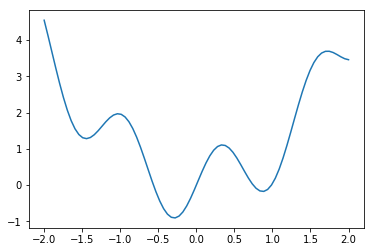

In [10]:
grid = anp.linspace(-2,2,80)
plt.plot(grid,g(grid))
plt.show()

Hence not the right minimizer.

In [11]:
findMinimizer(1, fp = gp, fpp = gpp)

The Newton method led to convergence.


0.87128108312270924

Still a no.

In [12]:
findMinimizer(-0.5, fp = gp, fpp = gpp)

The Newton method led to convergence.


-0.29083931499532345

This is the right one.

Problem 4

In [13]:
g = lambda x: x**2 + anp.sin(x) + anp.sin(10*x)
gp = lambda x: 2 * x + anp.cos(x) + 10 * anp.cos(10*x)

x_0 = 0
x_1 = -1

In [14]:
findMinimizer(x_0, gp,eps = 1e-5, x_1=x_1, method = 'Secant')

The Secant method led to convergence.


-0.16367722118191103

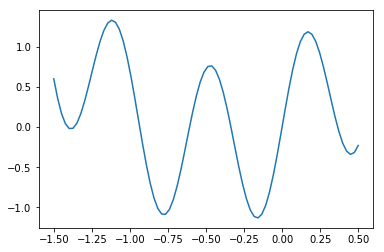

In [15]:
grid = anp.linspace(-1.5,0.5,80)
plt.plot(grid,g(grid))
plt.show()

Hence the function worked with this starting condition.

In [16]:
findMinimizer(x_0, gp,eps = 1e-5, x_1=0.5, method = 'Secant')

The Secant method led to convergence.


0.80868631362759957

In [17]:
findMinimizer(-0.5, gp,eps = 1e-5, x_1=0.5, method = 'Secant')

The Secant method led to convergence.


4.1521168874316112

As noted, the function is highly sensitive to the starting points.

Problem 5

In [18]:
def backtrack(f, Df, x_0, p, alpha = 1, c = 0.5, rho = 0.5):
    while f(x + alpha*p) > f(x) + c*alpha*Df(x).dot(p):
        alpha = rho*alpha
    return alpha

# Newton's Method

Problem 1

We just modify the minimizer slightly:

In [19]:

def findRoot(f, x_0, fp, eps = 1e-5, maxiter = 15, alpha = 1):
    dist = 1
    k = 1
    
    #maxiter = 50/eps
    
    while dist > eps and k < maxiter:
        x = x_0 - alpha * f(x_0)/fp(x_0)
            
        dist = abs(x - x_0)/abs(x_0)
        x_0 = x
        k += 1
        
    if k < maxiter:
        print("The Newton method led to convergence.")
        return x
    else:
        return x
        print('The function has not yet converged.')

In [20]:
f = lambda x: anp.exp(x) - 2
fp = lambda x: anp.exp(x)
x_0 = 2
xroot = findRoot(f, x_0, fp)
print(xroot)
f(xroot)

The Newton method led to convergence.
0.69314718056


0.0

In [21]:
import scipy.optimize as opt


opt.newton(f,x_0)

0.69314718055994551

In [22]:
f = lambda x: x**4 - 3
fp = lambda x: 4*x**3
x_0 = 2
xroot = findRoot(f, x_0, fp)
print(xroot)
anp.around(f(xroot),7)

The Newton method led to convergence.
1.3160740129524924


-0.0

In [23]:
import scipy.optimize as opt


opt.newton(f,x_0)

1.3160740129524926

The function works. 

Problem 2

In [24]:
def interestRoot(N1, N2, P1, P2, r_0 = 0.1):
    f = lambda x: P1*((1 + x)**N1 - 1) - P2*(1 - (1 + x)**(-N2))
    fp = lambda x: N1*P1*(1 + x)**(N1 - 1) - P2*N2*(1 + x) **(-N2 - 1)
    r = findRoot(f, r_0, fp)
    return r

In [25]:
interestRoot(30, 20, 2000, 8000)

The Newton method led to convergence.


0.038778432029673786

Problem 3

In [26]:

f = lambda x: anp.sign(x) * anp.power(anp.abs(x), 1./3)
fp = lambda x: (1/3) * anp.sign(x) * anp.power(anp.abs(x),-2./3)

def findRoot(f, x_0, fp, eps = 1e-5, maxiter = 15, alpha = 1):
    dist = 1
    k = 1
    
    #maxiter = 50/eps
    #print(dist > eps, k<maxiter)
    while dist > eps and k < maxiter:
        x = x_0 - alpha * f(x_0)/fp(x_0)
            
        dist = abs(x - x_0)
        x_0 = x
        k += 1
        
    if k < maxiter:
        #print("The Newton method led to convergence.")
        return x, k
    else:
        return x, k
        print('The function has not yet converged.')


In [27]:
print(findRoot(f, 0.01, fp, eps = 1e-5, maxiter = 15, alpha = 1)[0])



-1342177.28


In [28]:
findRoot(f, 0.01, fp, eps = 1e-5, maxiter = 15, alpha = 0.3)[0]

9.9999999999998196e-07

Problem 4

In [29]:

def alphaIter(f, x_0, fp, eps = 1e-5, maxiter = 15):
    agrid = anp.linspace(0.2, 0.4, 50)
    avals = anp.ones(len(agrid))
    
    for i in range(len(agrid)):
        avals[i] = findRoot(f, x_0, fp, eps = eps,
                                   maxiter= maxiter,
                                   alpha = agrid[i])[1]
    plt.plot(agrid, avals)

In [30]:
alphaIter(f, 0.01, fp, eps = 1e-5, maxiter = 15)

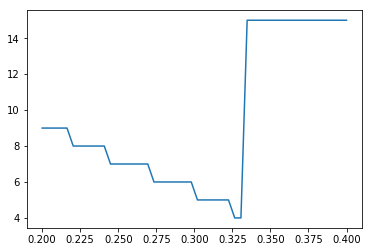

In [31]:
plt.show()

The optimal alpha is indeed closer to 0.3 than to 0.4 (indeed, we did not even converge for 0.4!).

Problem 5

In [358]:
def findvecRoot(f, x_0, Df, eps=1e-5, maxiter=15, alpha=1):
    
    if anp.isscalar(x_0):
        #print('scalar')
        return findRoot(f, x_0, Df, eps, maxiter, alpha)
    else:
        #for i in range(len(x_0)):
        
        k = 0
        dist = 1
        #print(dist > eps, k < maxiter)
        while dist > eps and k < maxiter:
            '''if anp.isscalar(f(x_0)):
                vec = anp.ones(len(x_0))
                for i in range(len(x_0)):
                    vec[i] = 1/(Df(x_0)[i])
                y = f(x_0) * vec[i]
            else:'''
            y = anp.dot(anp.linalg.pinv(Df(x_0).T),f(x_0))
            #y = anp.linalg.solve(Df(x_0),f(x_0))
            x = x_0 - alpha * y
            #print(x)
            dist =  anp.linalg.norm(x - x_0)
            x_0 = x
            k += 1
        if k < maxiter:
            #print("The Newton method led to convergence.")
            return x, k
        else:
            return x, k
            print('The function has not yet converged.')    
            



In [359]:
def h(x):
    return x[0]**2 + (x[1] - 1)**2, (x[0] + 1)**2 - 1 + x[1]**2 - 1

In [360]:
def Dh(x):
    a11, a12 = 2*x[0], 2*(x[1] - 1)
    
    a21, a22 = 2*(x[0] + 1), 2*x[1]
    
    return anp.array([[a11, a12],[a21, a22]])



In [361]:
sol = findvecRoot(h, anp.array(([20., -200.0])), Dh, eps=1e-10, maxiter = 800, alpha = 1)
sol[0]

array([  1.76434712e+17,  -1.76434712e+17])

In [362]:
h(sol[0])

(6.2258415430203144e+34, 6.2258415430203144e+34)

It works! (Though the pseudo inverse might make it inaccurate in some cases, and convergence can easily fail...)

Problem 6

In [375]:

def findIval( eps=1e-5, maxiter = 15):
    Ivals = ["For (0, 1) or (0, -1)","For (3.75, .25)"]
    critVals = [anp.array([0, 1]), anp.array([0, -1]), anp.array([3.75, .25])]
    
    m = 201
    xvals = anp.linspace(-0.25, -0., m)
    yvals = anp.linspace(0., 0.25, m)
    
    gamma = 5
    delta = 1
    
    def f(x):
        f1 = gamma * x[0] * x[1] - x[0] * (1 + x[1])
        f2 = - x[0] * x[1] + (delta - x[1]) * (1 + x[1])
        return  anp.array([f1,f2])
    
    def Df(x):
        a11 = gamma * x[1] - (1 + x[1])
        a12 = gamma * x[0] - x[0]
        a21 = - x[1]
        a22 = - x[0] - 2*x[1] - (1 - delta)
        return anp.array([[a11, a12],[a21, a22]])
    
    valsFound = False
    i = 0
    while valsFound == False and i<m:
        j = 0
        while valsFound == False and j<m:
            x_0 = anp.array([xvals[i],yvals[j]])
            
            r1 = findvecRoot(f, x_0, Df, 0.1 * eps, maxiter, alpha = 1)[0]
            #print('r1', x_0, r1)
            if min(anp.linalg.norm(r1 - critVals[0]),
                   anp.linalg.norm(r1 - critVals[1])) < eps:
                #Ivals[0] = r1
                r2 = findvecRoot(f, x_0, Df, 0.1 * eps, maxiter, alpha = 0.6)[0]
                #print('x, r1, r2', x_0, r1, r2)
                if anp.linalg.norm(r2 - critVals[2]) < eps:
                    #Ivals[0] = r1
                    #Ivals[1] = r2
                    valsFound = True
                    break
            j += 1
        if valsFound == True:
            return x_0
            break
        i += 1     
    return print('Value not found')
    
    
        

In [370]:
findIval(eps=1e-5, maxiter = 25)

Value not found


I tried different grids, and double and triple checked the input and my functions. All see correct - if you find the error, please tell me!

Being told by peers that (-0.25, 0.2) might supposedly work, I iterate over alpha (with 1001 alpha values!), to no avail.

In [378]:
alphaFound = False
for alpha in anp.linspace(0,1,1001):
    r = findvecRoot(f, anp.array([-0.25, 0.2]), Df, 1e-2, maxiter = 30, alpha = alpha)[0]
    if anp.linalg.norm(r - anp.array([3.75, .25])) < 1e-1:
        alphaFound = True
        print(alpha)
if alphaFound == False:
    print("No alpha found!")
        

No alpha found!


In [381]:
def findIval( eps=1e-5, maxiter = 15):
    Ivals = ["For (0, 1) or (0, -1)","For (3.75, .25)"]
    critVals = [anp.array([0, 1]), anp.array([0, -1]), anp.array([3.75, .25])]
    
    m = 201
    xvals = anp.linspace(-0.25, 0.25, m)
    yvals = anp.linspace(-0.25, 0.25, m)
    
    gamma = 5
    delta = 1
    
    def f(x):
        f1 = gamma * x[0] * x[1] - x[0] * (1 + x[1])
        f2 = - x[0] * x[1] + (delta - x[1]) * (1 + x[1])
        return  anp.array([f1,f2])
    
    def Df(x):
        a11 = gamma * x[1] - (1 + x[1])
        a12 = gamma * x[0] - x[0]
        a21 = - x[1]
        a22 = - x[0] - 2*x[1] - (1 - delta)
        return anp.array([[a11, a12],[a21, a22]])
    
    valsFound = False
    i = 0
    while valsFound == False and i<m:
        j = 0
        while valsFound == False and j<m:
            x_0 = anp.array([xvals[i],yvals[j]])
            
            r1 = findvecRoot(f, x_0, Df, 0.1 * eps, maxiter, alpha = 1)[0]
            #print('r1', x_0, r1)
            if min(anp.linalg.norm(r1 - critVals[0]),
                   anp.linalg.norm(r1 - critVals[1])) < eps:
                #Ivals[0] = r1
                r2 = findvecRoot(f, x_0, Df, 0.1 * eps, maxiter, alpha = 0.6)[0]
                #print('x, r1, r2', x_0, r1, r2)
                if anp.linalg.norm(r2 - critVals[2]) < eps:
                    #Ivals[0] = r1
                    #Ivals[1] = r2
                    valsFound = True
                    break
            j += 1
        if valsFound == True:
            return x_0
            break
        i += 1     
    return print('Value not found')
    
    
        

In [382]:
findIval(eps=1e-5, maxiter = 25)

Value not found


Problem 7

In [395]:
def findCRoot(f, Df, roots, bounds, res, iters):
    x_real = anp.linspace(bounds[0],bounds[1],res)
    x_imag = anp.linspace(bounds[2],bounds[3],res)
    X_real, X_imag = anp.meshgrid(x_real,x_imag)
    X_0 = X_real+1j*X_imag
    
    for i in range(iters):
        X_1 = X_0 - f(X_0)/Df(X_0)
        X_0 = X_1
        if 
    Y = anp.zeros((res,res))
    for r in range(res):
        for j in range(res):
            Y[r,j] = anp.argmin(anp.abs(roots - X_0[r,j]))
    plt.pcolormesh(x_real, x_imag, Y, cmap = 'brg')
    plt.show()
    return

/Users/Jan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide
/Users/Jan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


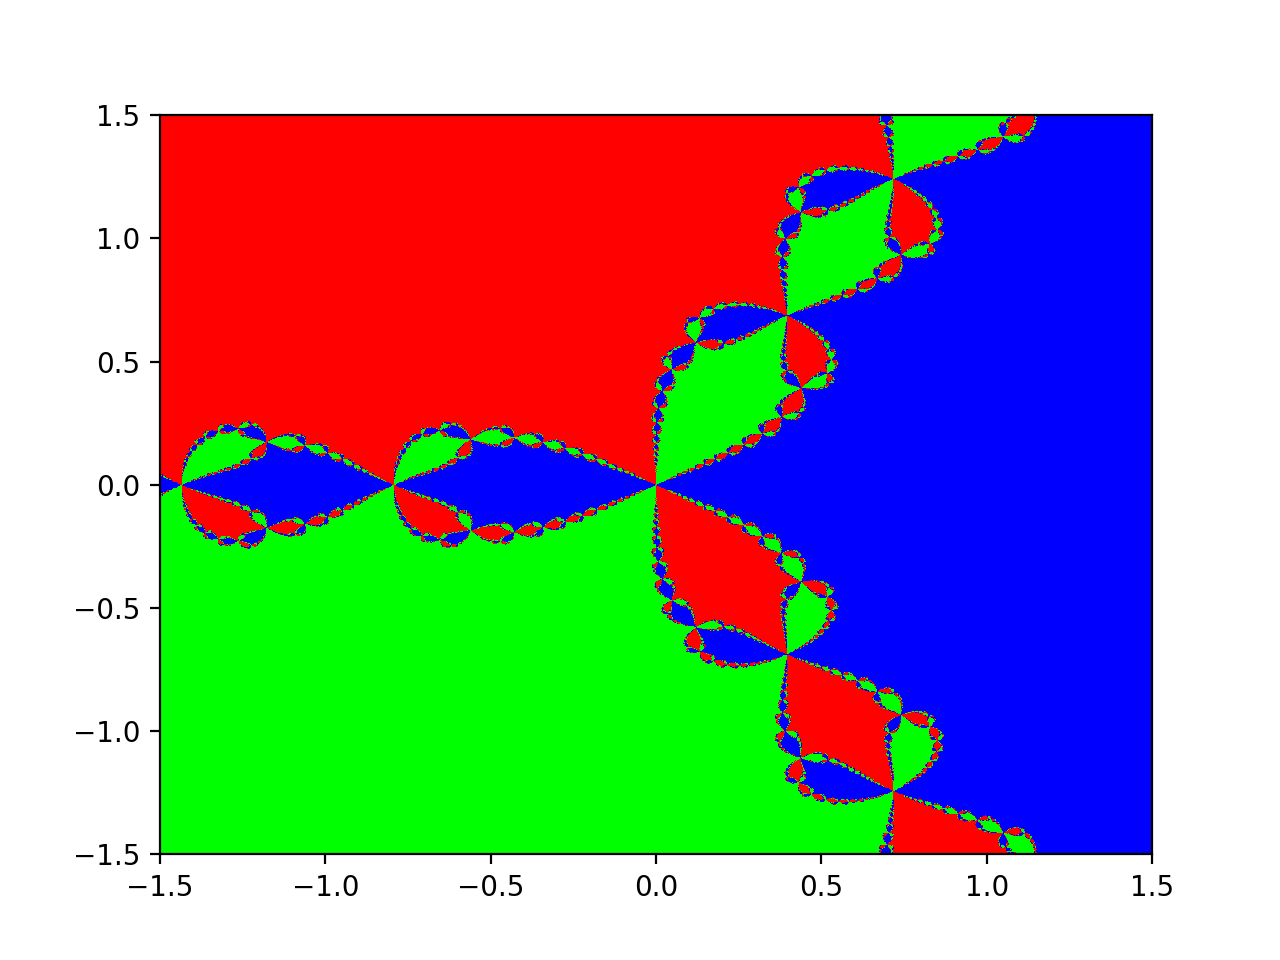

In [408]:

f = lambda x: x**3 - 1
Df = lambda x: 3*x**2
roots = anp.array([1, -1/2 + (anp.sqrt(3)/2)*1j, -1/2 - (anp.sqrt(3)/2)*1j])
bounds = anp.array([-1.5,1.5,-1.5,1.5])
res = 1001
iters = 15
findCRoot(f, Df, roots, bounds, res, iters)
plt.show()


<IPython.core.display.Javascript object>


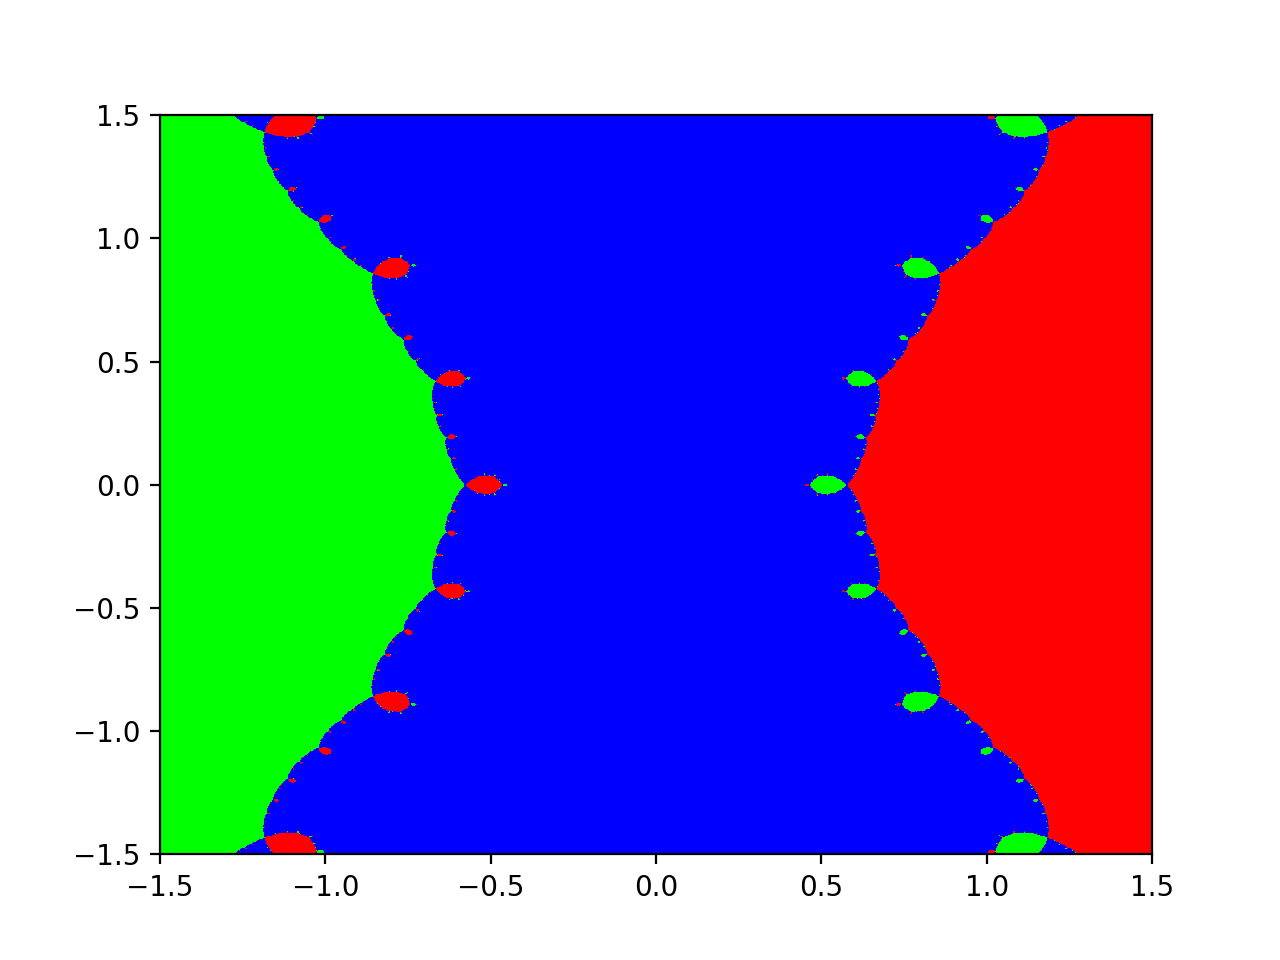

In [409]:
f = lambda x: x**3 - x
Df = lambda x: 3*x**2 - 1
roots = anp.array([0,1,-1])
bounds = anp.array([-1.5,1.5,-1.5,1.5])
res = 1001
iters = 15
findCRoot(f, Df, roots, bounds, res, iters)

plt.show()

I was just curious and wanted to zoom in on the first one:

/Users/Jan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide
/Users/Jan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


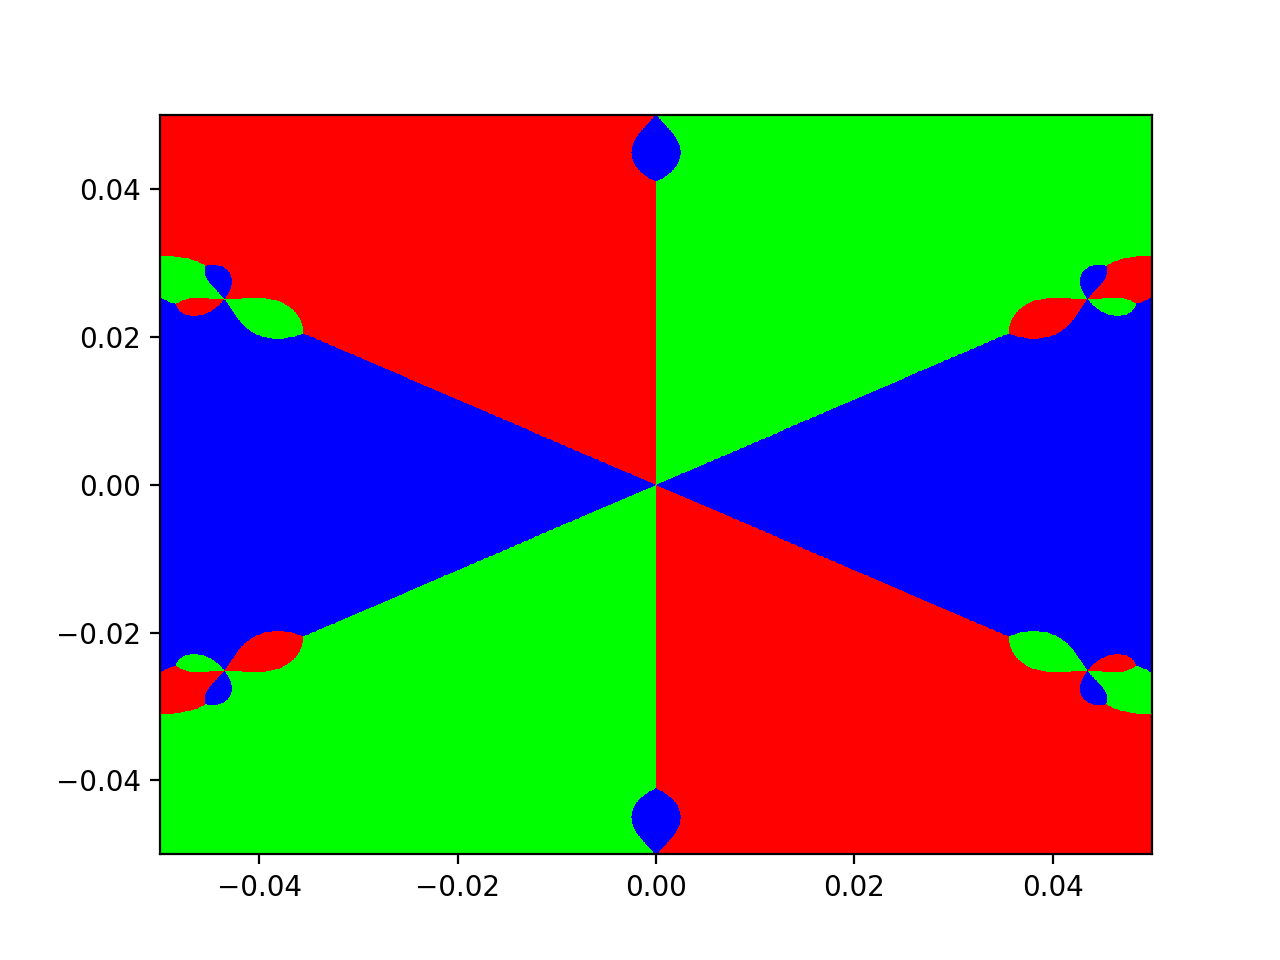

In [411]:

f = lambda x: x**3 - 1
Df = lambda x: 3*x**2
roots = anp.array([1, -1/2 + (anp.sqrt(3)/2)*1j, -1/2 - (anp.sqrt(3)/2)*1j])
bounds = anp.array([-0.05,0.05,-0.05,0.05])
res = 1001
iters = 15
findCRoot(f, Df, roots, bounds, res, iters)
plt.show()

Neat.

Unrelated:

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')

<IPython.core.display.Javascript object>


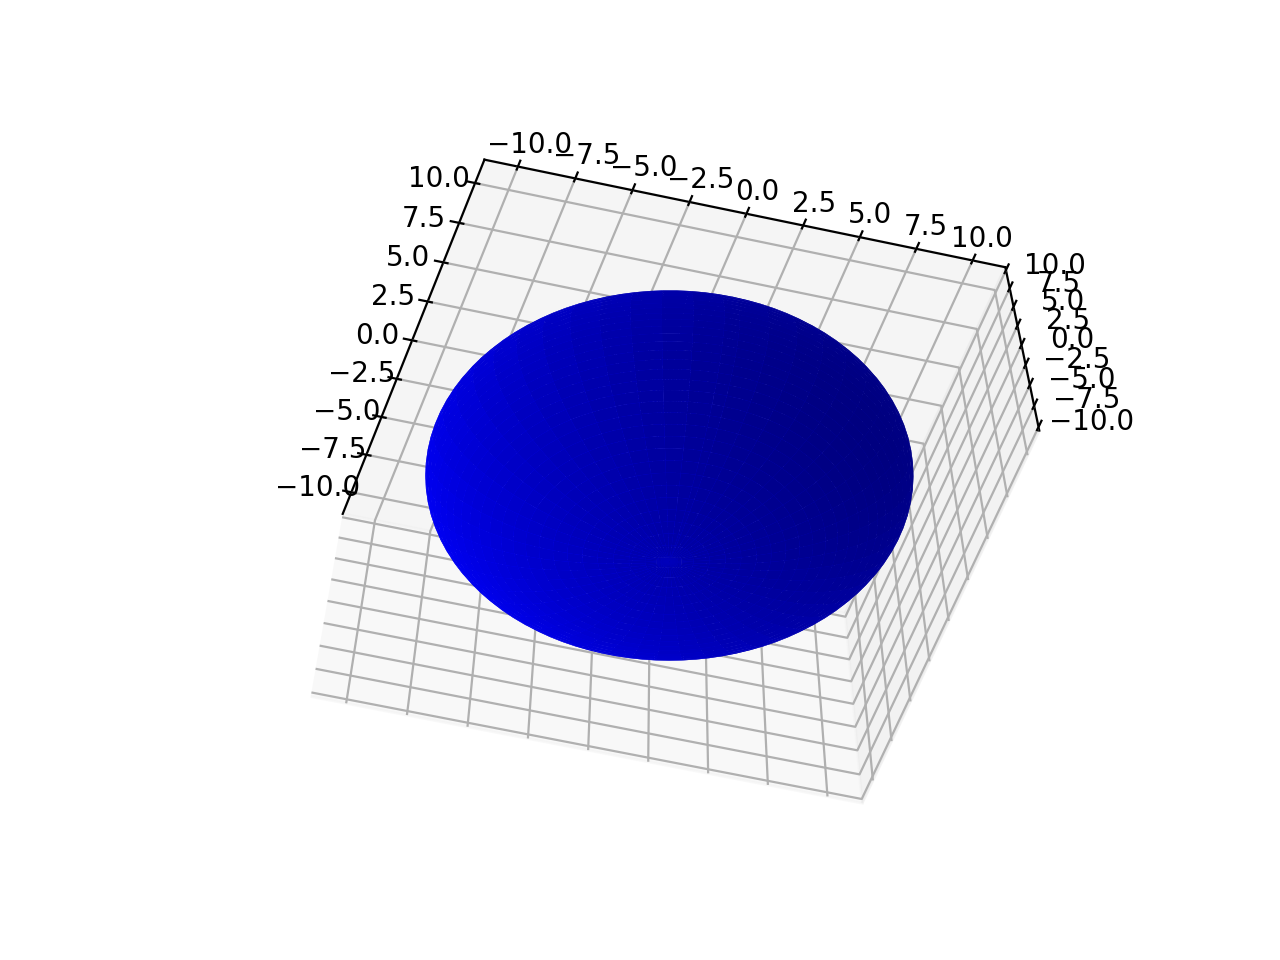

In [90]:
'''
========================
3D surface (solid color)
========================

Demonstrates a very basic plot of a 3D surface using a solid color.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
u = anp.linspace(0, 2 * anp.pi, 100)
v = anp.linspace(0, anp.pi, 100)
x = 10 * anp.outer(anp.cos(u), anp.sin(v))
y = 10 * anp.outer(anp.sin(u), anp.sin(v))
z = 10 * anp.outer(anp.ones(anp.size(u)), anp.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, color='b')

plt.show()
